# Introduction to Image Processing: part 2

### Description

We are re-using here some of the methods done in the previous notebook!

## Step 1: Image compression

In [3]:
from PIL import Image
from PIL import ImageFilter
import numpy as np

# this function prints a larger version of the image!
def printLargeImage(smallImage,factor):
    maxsize = tuple([factor*x for x in smallImage.size])
    largeImage = smallImage.resize(maxsize)
    display(largeImage)
    return

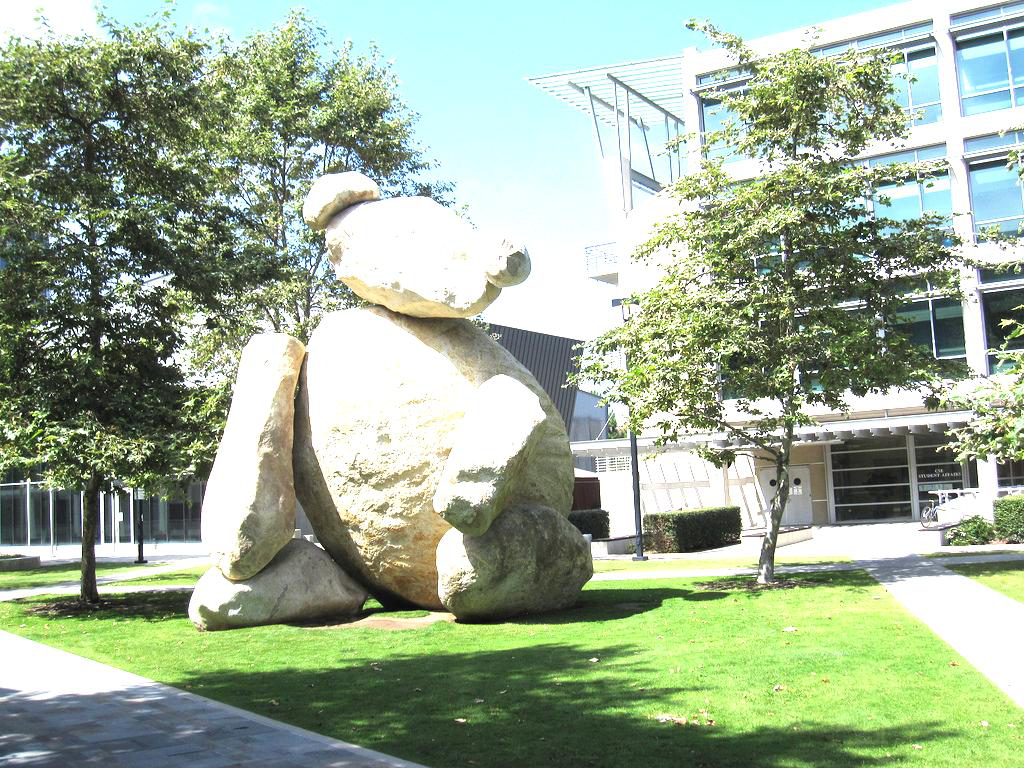

In [4]:
#let's open an image:
image = Image.open("data/bear_BRIGHT.jpg")

# and let's visualize it:
display(image)

# first, let's read the image as a numpy array 
im_array = np.array(image)


In [5]:
# 1. compress the image (16 times smaller)
compr = 4

# the new image should have this size:
im_compressed = np.zeros([int(im_array.shape[0]/compr),int(im_array.shape[1]/compr),3]).astype('uint8')

# each pixel should be the average of... 16 pixels (still in RGB!) can you do that with few for loops?

# ****************** 
# 1. YOUR CODE HERE

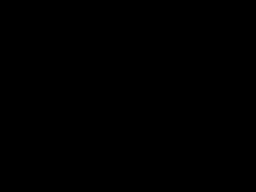

In [6]:
# let's print the image (factor 1 = current size, you can increase it if you want it larger)
image2 = Image.fromarray(im_compressed)
printLargeImage(image2,1)

# Exercise 2: Edge Detection

Begin with the twitter logo image `data/twitter.png`, then try it on `data/bear.jpg` from above.

## Goal

For this project you will implement a very basic edge detection algorithm by following these steps:

1. Convert the image to grayscale
2. Take the spatial gradient of the image
3. Apply a threshold to the gradient
4. Convert the result back to an image and display it

## Note

Edge detection is an active area of research with some pretty impressive algorithms.  This one is extremely simple, and so the results are only ok.

After you finish this, you might enjoy reading the Wikipedia article on [Edge Detection](https://en.wikipedia.org/wiki/Edge_detection).

## Hints

* The `.convert('L')` method translates the image to grayscale.
* There are many different ways to solve this problem, but using [`numpy.gradient`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.gradient.html) will make it much easier.
    - gradient outputs the differences between the pixels in the horizontal and vertical directions.
    
## Do not limit yourself to these images!
* Download the image you want from the Internet
* Try your code !

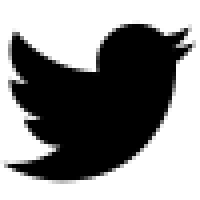

(200, 200)
<class 'list'>
(2, 200, 200)
(200, 200)
-212.0
193.5
-273.90180878552974
250.0
0
255


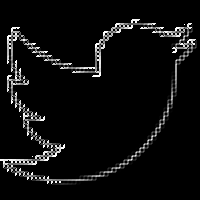

In [7]:
import numpy as np 
twitter = Image.open('data/twitter.bmp')
display(twitter)

# how does it look like in numpy?
twitterData = np.array(twitter)
print(twitterData.shape)

# notice that it is a 2D matrix (not a 3D) -> it is already in grayscale!


# let's calculate the gradient from the 2D matrix
twitterGradient = np.gradient(twitterData)
print(type(twitterGradient)) # wait, this is a list!
print(np.shape(np.array(twitterGradient))) # wrong dimensionality

# ok, let's just look at the gradient on axis 1
twitterGradient = np.gradient(twitterData, axis=1)+ np.gradient(twitterData, axis=0)
twitterGradient = np.array(twitterGradient)
print(np.shape(twitterGradient)) # ok dimensionality

# let's check how it looks like
print(np.min(twitterGradient))
print(np.max(twitterGradient))

# let's make it more "extreme" -> max to 250 !
twitterGradient *= 250./np.max(twitterGradient)

# let's check how it looks like
print(np.min(twitterGradient))
print(np.max(twitterGradient))

# these values must be integers! attention that .astype does not change the format of the image in place
twitterGradient = twitterGradient.astype('uint8')

# let's check how it looks like
print(np.min(twitterGradient))
print(np.max(twitterGradient))

imageEdges = Image.fromarray(twitterGradient)

display(imageEdges)




In [ ]:
# NEXT: do it for the another (SIMPLE) image !
# better to use: grayimage = image.convert('L')
# can you merge axis=0  and axis=1, to get better results? (try with twitter first!)

# ****************** 
# 2. YOUR CODE HERE

# Exercise 3: Image Processing From Scratch



### Project Goal

Write your own Instagram filter!

The plot below shows histograms of the RGB colorspace.  Think about how you might manipulate the pixels to change those histograms and "enhance" your favorite photo.

In [8]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def print_RGB_histogram(image_array):
    num_bins = 255

    fig, ax = plt.subplots(3, sharex=True)

    # the histogram of the data
    n, bins, patches = ax[0].hist(image_array[:,:,0].flatten(), num_bins, color="red")
    n, bins, patches = ax[1].hist(image_array[:,:,1].flatten(), num_bins, color="green")
    n, bins, patches = ax[2].hist(image_array[:,:,2].flatten(), num_bins, color="blue")

    plt.show()

In [ ]:
# show the RGB histogram for some of the photos we have seen (the bear! or the dark bear, or the overexposed bear)

# ****************** 
# 3. YOUR CODE HERE

In [ ]:
print_RGB_histogram(im_array)

# Exercise 4: We are ready to complete the assignment!



### New images from online!
- let's download a new image
- let's fix its light!


In [ ]:
from urllib.parse import urlparse
import urllib.robotparser

# This code checks the robots.txt file (from the Text: web scraping)
def canFetch(url):

    parsed_uri = urlparse(url)
    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

    rp = urllib.robotparser.RobotFileParser()
    rp.set_url(domain + "/robots.txt")
    try:
        rp.read()
        canFetchBool = rp.can_fetch("*", url)
    except:
        canFetchBool = None
    
    return canFetchBool

In [ ]:
url = 'https://phlearn.com/wp-content/uploads/2018/04/save-underexposed-before-1200.jpg'
canFetch(url)

In [ ]:
# let's get the image from the web!

if canFetch(url):
    image = Image.open(urllib.request.urlopen(url))

In [ ]:
# here is the image... it is dark, isn't it?

display(image)

In [ ]:
# let's transform it to a numpy array
im_array = np.array(image)

In [ ]:
# let's plot its hystogram (and let's think what we can do to make it better)

# ****************** 
# 4. YOUR CODE HERE

In [ ]:
# GOAL: let's make it brighter! 
# no pixel larger than 255
# make pixels well distributed btw 0 and 255

# ****************** 
# 5. YOUR CODE HERE

In [ ]:
# check the new hystogram

# ****************** 
# 6. YOUR CODE HERE

In [ ]:
#show the new fixed image!

# ****************** 
# 7. YOUR CODE HERE